Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [ ]:
NAME = "marcojim"  # your uniqname 
COLLABORATORS = c()  # vector of uniqnames of your collaborators, if any
## IMPORTANT: also enter your group information in Canvas when you upload the assignment

---

In [1]:
library(tidyverse)
library(nycflights13)


Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'nycflights13' was built under R version 3.4.3"

# STATS 306
## Problem set 3: data manipulation II
These questions again focus on the `flights` dataset. Each question is worth two points, for a total of 20.

*Note*: you do not need to use `install.packages()` in this notebook. You may assume that we have already installed all of the necessary packages when we run your code.

#### Problem 1
Recall that each airplane has a unique tail number given by `tailnum`. Find the tail number of the airplane which flew to the largest number of unique destinations from NYC airports in 2013. Store the string containing this tail number in a variable called `most_dests`.

In [23]:
# YOUR CODE HERE

flights %>% filter(origin=="JFK" | origin=="LGA", !is.na(tailnum)) %>% group_by(tailnum) %>%
    summarise(number_dest = n_distinct(dest)) %>% top_n(1,number_dest) -> flight_info
most_dest <- flight_info$tailnum

[1] "N520JB" "N531JB" "N606JB"


In [ ]:
stopifnot(exists("most_dests"))

#### Problem 2
Define a new table `flights2` obtained by adding a new column `dow` equal to the day of the week on which that flight took place. For example, the first flight in `flights` took place on Tuesday, January 1, 2013, so the first entry of column `dow` should equal `Tuesday`.

In [26]:
flights %>% mutate(dow = weekdays(as.Date(paste(day,month,year,sep="-"),'%d-%m-%Y'))) ->flights2

In [ ]:
stopifnot(exists("flights2"))

#### Problem 3
Define a new table `flights3` by adding a new column `doy` equal to the numerical day of the year in which that flight took place. For example, the final flight in `flights` took place during on December 31st, so since 2013 was not a leap year, the final entry of `doy` should equal 365.

In [27]:

flights %>% mutate(doy = format(as.Date(paste(day,month,year,sep="-"),'%d-%m-%Y'),"%j")) -> flights3
print(filter(flights3,doy==273))
# YOUR CODE HERE


# A tibble: 993 x 20
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     9    30      453            500     -7.00      621            648
 2  2013     9    30      516            517     -1.00      734            757
 3  2013     9    30      540            545     -5.00      821            855
 4  2013     9    30      540            545     -5.00      918            933
 5  2013     9    30      549            550     -1.00      911            932
 6  2013     9    30      549            545      4.00      825            827
 7  2013     9    30      551            600     -9.00      827            851
 8  2013     9    30      552            600     -8.00      820            827
 9  2013     9    30      552            600     -8.00      650            708
10  2013     9    30      552            600     -8.00      647            700
# ... with 983 more rows, and 1

In [ ]:
stopifnot(exists('flights3'))

#### Problem 4
Use your solution from problem 2 to define a new variable `week` such that  `week=1` for `doy=1,2,...,7`, `week=2` for `doy=8,...,14`, etc. Store the resulting table in a variable called `flights4`.

In [29]:
flights4 = mutate(flights3, week = as.numeric(doy)%/%7 )
print(filter(flights4,week==30))

# A tibble: 6,734 x 21
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     7    29        5           2359      6.00      403            340
 2  2013     7    29      310           2305    245         402             13
 3  2013     7    29      502            500      2.00      640            640
 4  2013     7    29      515            515      0         746            725
 5  2013     7    29      541            545   -  4.00      928            921
 6  2013     7    29      547            536     11.0       803            806
 7  2013     7    29      548            540      8.00      845            840
 8  2013     7    29      553            600   -  7.00      817            830
 9  2013     7    29      554            600   -  6.00      713            711
10  2013     7    29      554            600   -  6.00      653            655
# ... with 6,724 more rows, a

In [ ]:
stopifnot(exists("flights4"))

#### Problem 5
Let a flight's "positive arrival delay" be defined as the larger of `arr_delay` and zero. We say a flight is *ridiculously late* if its arrival delay was more than ten times the average positive arrival delay for all flights in that week.
- Use your solution from problem 4 to calculate the number of ridiculously late flights in each week of the year.
- Also add in the total number of flights in the data set for each week. 

Sort the resulting table in descending order of the number of ridiculously late flights and store it in a variable called `table5`. The table should have three columns, `week`, `n`, and `n_ridiculously_late`.

In [35]:
flights4 %>% group_by(week) %>% mutate(avg_arr_delay_per_week=mean(arr_delay,na.rm=TRUE)) -> table_avg_arr_delay_per_week
print(table_avg_arr_delay_per_week)
table_avg_arr_delay_per_week %>% group_by(week) %>% filter(arr_delay > 10*avg_arr_delay_per_week) %>%
    count -> table51
colnames(table51) <- c("week", "n_ridiculously_late")
table_avg_arr_delay_per_week %>% group_by(week) %>% count -> table52
table5 = merge(table51,table52)
print(table5)

# A tibble: 336,776 x 22
# Groups: week [53]
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515      2.00      830            819
 2  2013     1     1      533            529      4.00      850            830
 3  2013     1     1      542            540      2.00      923            850
 4  2013     1     1      544            545     -1.00     1004           1022
 5  2013     1     1      554            600     -6.00      812            837
 6  2013     1     1      554            558     -4.00      740            728
 7  2013     1     1      555            600     -5.00      913            854
 8  2013     1     1      557            600     -3.00      709            723
 9  2013     1     1      557            600     -3.00      838            846
10  2013     1     1      558            600     -2.00      753            745
# ... w

In [ ]:
stopifnot(exists("table5"))

#### Problem 6
Use your solution in part 5
to generate a bar plot, by week, of the number of ridiculously late flights each week. Give your plot an appropriate title and axis labels.

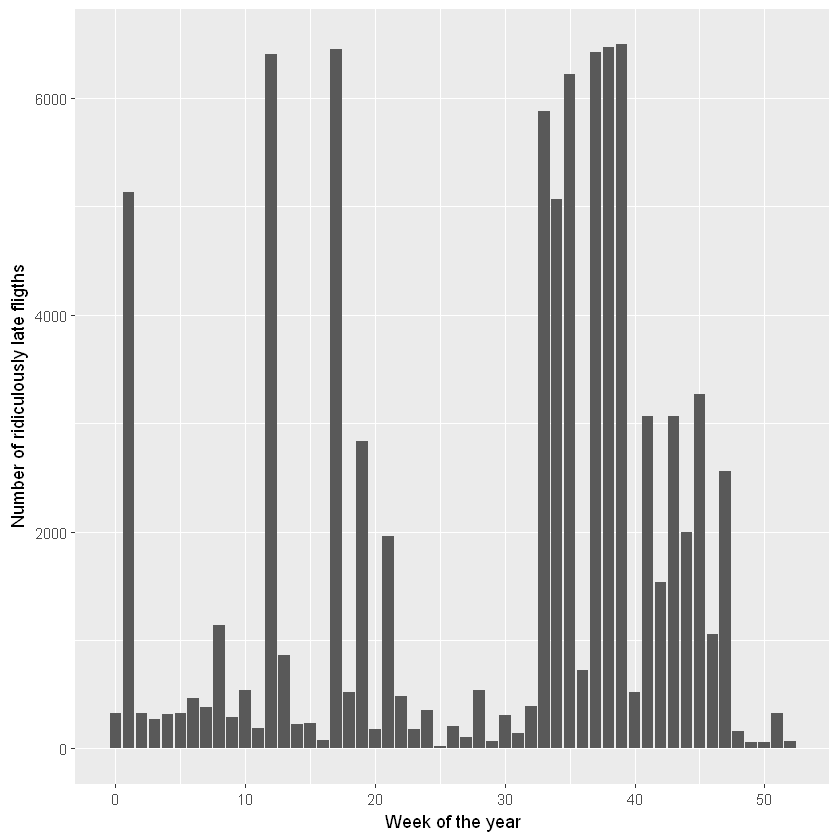

In [36]:
ggplot(data = table5) +
  geom_bar(mapping = aes(x = week,y = n_ridiculously_late), stat = "identity") + 
  xlab("Week of the year") + ylab("Number of ridiculously late fligths")


#### Problem 7
Your plot in problem 6 should have a curious feature: in a couple of weeks there were far fewer ridiculously late flights than the rest. 
- Investigate this further by determining the fraction arrival delay times which were missing in each week. 
- Additionally, rank each week by this fraction. The week with the highest fraction of missing arrival delay times should have rank one, second highest rank two, and so on.

Store the result in a variable called `table7`. 
Your table should have three columns: `week`, `p_miss_arr_delay` and `rank`.

In [57]:
flights4 %>% filter(is.na(arr_delay)) %>% group_by(week) %>% count -> number_of_arr_delay_missing
colnames(number_of_arr_delay_missing) <- c("week", "arr_delay_missing")
flights4 %>% group_by(week) %>% count -> flights_per_week
above2 = merge(number_of_arr_delay_missing,flights_per_week)
above2 %>% mutate(p_miss_arr_delay = arr_delay_missing/n) %>% select(week,p_miss_arr_delay) -> table7
table7 %>% mutate(zz = 1-p_miss_arr_delay)%>% mutate(rank(zz)) ->table7
colnames(table7) <- c("week","p_miss_arr_delay","zz","rank")
table7 <- select(table7,week, p_miss_arr_delay,rank)
print(table7)

   week p_miss_arr_delay rank
1     0      0.010259388   42
2     1      0.010631338   40
3     2      0.016572754   33
4     3      0.018184824   30
5     4      0.052944087    9
6     5      0.154816514    1
7     6      0.022289929   23
8     7      0.015984955   36
9     8      0.022036002   24
10    9      0.081271005    3
11   10      0.016475973   34
12   11      0.022300290   22
13   12      0.017557252   32
14   13      0.005157767   51
15   14      0.042643278   11
16   15      0.040924192   12
17   16      0.025304878   16
18   17      0.008122605   47
19   18      0.023563838   20
20   19      0.007818488   48
21   20      0.057570978    5
22   21      0.023608769   19
23   22      0.020763359   26
24   23      0.035956070   13
25   24      0.019161677   28
26   25      0.085061931    2
27   26      0.034076227   14
28   27      0.053410268    8
29   28      0.021226065   25
30   29      0.056083086    6
31   30      0.022869023   21
32   31      0.025100252   17
33   32   

In [ ]:
stopifnot(exists("table7"))

#### Problem 8
For the week with the highest fraction of missing arrival times in problem 6, generate a table `table8` which shows the total number of missing arrival delay values for each day of that week. Your table should have columns `year`, `month`, `day`, and `n_miss_arr_delay` and be sorted by year, month, and day.

In [69]:
filter(flights4, week==5, is.na(arr_delay)) %>%  group_by(year,day,month) -> tx
tx %>% summarise(n_miss_arr_delay = n()) %>% arrange(year,day,month) ->table8
print(table8)


# A tibble: 7 x 4
# Groups: year, day [7]
   year   day month n_miss_arr_delay
  <int> <int> <int>            <int>
1  2013     4     2               14
2  2013     5     2               19
3  2013     6     2                9
4  2013     7     2                7
5  2013     8     2              475
6  2013     9     2              393
7  2013    10     2               28


In [ ]:
stopifnot(exists("table8"))

#### Problem 9
Two days in `table8` should stand out from the rest. To figure out what is going on, we will pull in some climate data using the package `rnoaa`. You do not need to install this package; I have run the command and saved the output for you.

In [70]:
load('nyc_weather.RData')
# this is the output of:
# library(rnoaa)
# # (daily weather data from Central Park)
# nyc_weather = as.tibble(meteo_pull_monitors("USW00094728", 
#                                  date_min="2013-01-01",
#                                  date_max="2013-12-31"))
# nyc_weather = mutate(nyc_weather, year=year(date), month=month(date), day=day(date)) %>% 
#               select(nyc_weather, year, month, day, prcp, snow, tmax) 
# save(nyc_weather, file="nyc_weather.RData")

The table `nyc_weather` contains daily weather observations from Central Park in New York City. We need to merge this information in with the table you obtained in the previous exercise. Since we have not covered merges yet, the command to do so is provided for you:

In [71]:
table9 = inner_join(table8, nyc_weather)

Joining, by = c("year", "day", "month")


Use `table9` to generate a bar plot of total snowfall for each day of the week in question. Add to this plot a line showing the total number of flights with missing arrival times for each day.

# A tibble: 7 x 7
# Groups: year, day [?]
   year   day month n_miss_arr_delay   prcp  snow  tmax
  <dbl> <int> <dbl>            <int>  <dbl> <dbl> <dbl>
1  2013     4  2.00               14   0      0   -11.0
2  2013     5  2.00               19   5.00  10.0   0  
3  2013     6  2.00                9   0      0    39.0
4  2013     7  2.00                7   0      0     0  
5  2013     8  2.00              475 292    160    11.0
6  2013     9  2.00              393  97.0  130     0  
7  2013    10  2.00               28   0      0    22.0


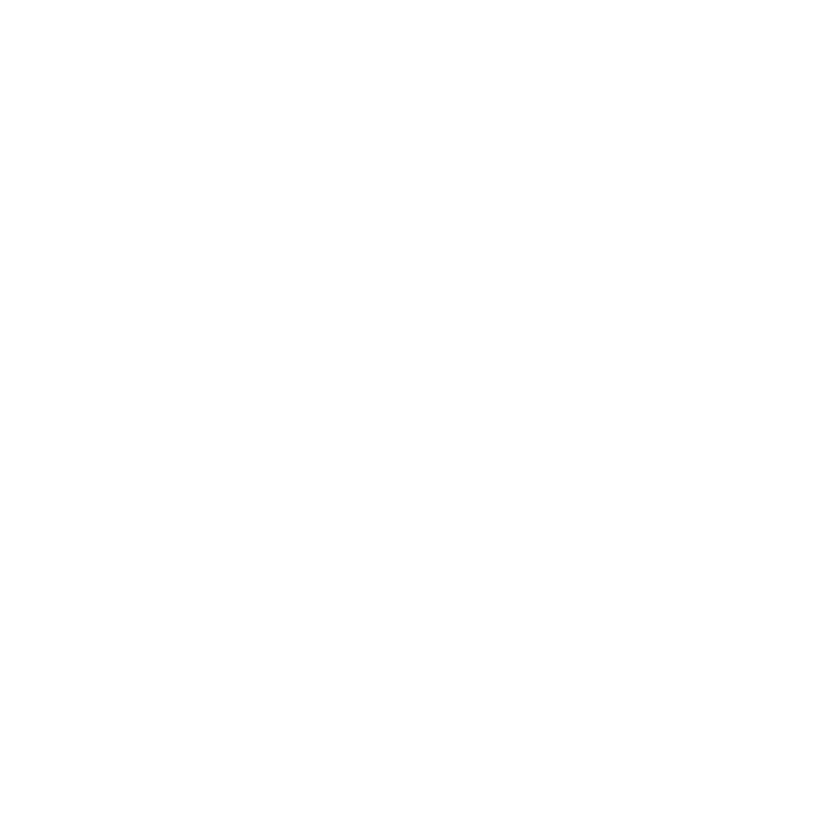

In [100]:
library(ggplot2)
print(table9)
plot <- ggplot() +
  geom_line(data=table9,aes(x=day,y=snow)) 
plot <- plot + geom_bar(data=table9,mapping=aes(x=day,y=n_miss_arr_delay))
plot


#### Problem 10
In your own words, summarize your findings from problems 8-10. What do `NA`s for arrival and departure delay likely represent in these data?

It is clear that during the snow storm it was when the arrival delays where not recorded. This is most likely because the plain would not be able to land at the airport during the storm, and therefore, they never arrived to it. 